# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
pwd

u'C:\\Users\\jeana\\Documents\\jeana-curro-portfolio'

In [3]:
df = pd.read_csv(os.path.join('..', 'DAT-NYC-45', 'unit-project', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Answer: 400

> ### Question 2.  Create a summary table.

In [5]:
df.describe()

C:\Users\jeana\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [6]:
print df['gre'].var()
print df['gpa'].var()

13369.9530398
0.144879486222


Answer:  The range for gre is much larger (spanning 220 to 800) than the range for gpa (spanning 2.26 to 4.0)

> ### Question 4.  Drop data points with missing data.

In [7]:
df2=df.copy().dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [8]:
df2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: now our dataset only has 397 observations (vs 400) and we are able to compute all quartiles.  (If na values were present, it would show NAN for quartiles of those columns with missing data, as in Question 2)

> ### Question 6.  Create boxplots for `gre` and `gpa`.

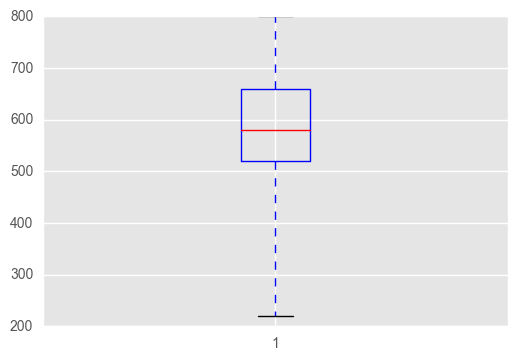

In [9]:
plt.boxplot(df2['gre'],whis='range');

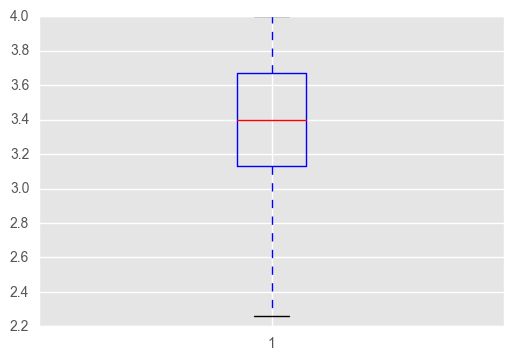

In [10]:
plt.boxplot(df2['gpa'],whis='range');

> ### Question 7.  What do boxplots show?

Answer: Boxplots graphically show the median (red line), minimum (bottom line), maximum (top line), 25% (bottom line of box), and 75% (top line of box) of our given data. 

In our boxplot for gre for example, we see the min, 25%, med, 75% and max are 220,520,580,660, and 800 respectively.  In our boxplot for gpa, the min, 25%, med, 75% and max are 2.26, 3.13, 3.40, 3.67, and 4.0 respectively.  

> ### Question 8.  Plot the distribution of each variable.

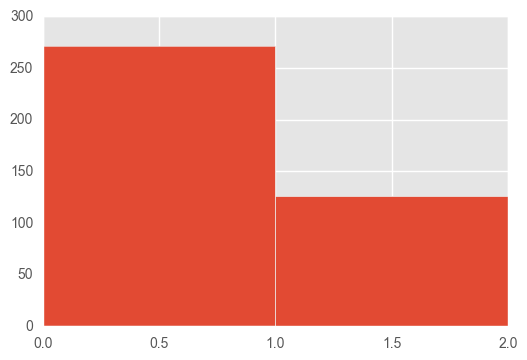

In [11]:
plt.hist(df2['admit'],bins=2,range=(0,2));

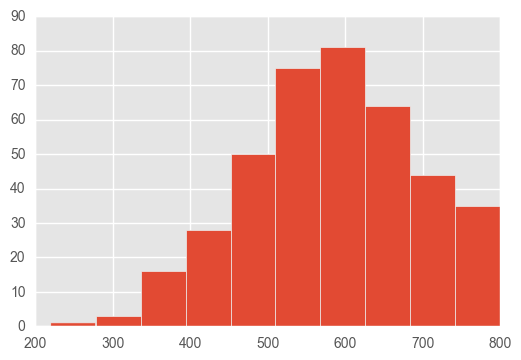

In [12]:
plt.hist(df2['gre']);

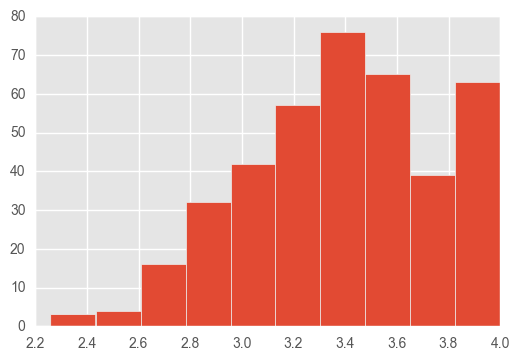

In [13]:
plt.hist(df2['gpa']);

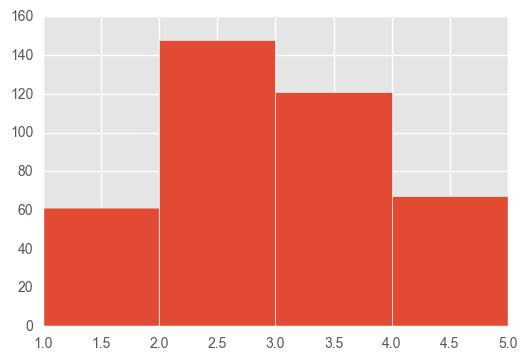

In [14]:
plt.hist(df2['prestige'],bins=4,range=(1,5));

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer:  Our datasets appear normally distributed.  First both histograms are pretty much symmetrical (although just marginally skewed to the right).  Second, both distributions have means very close to (within 1% of) median.  

Charts and ratios below. 

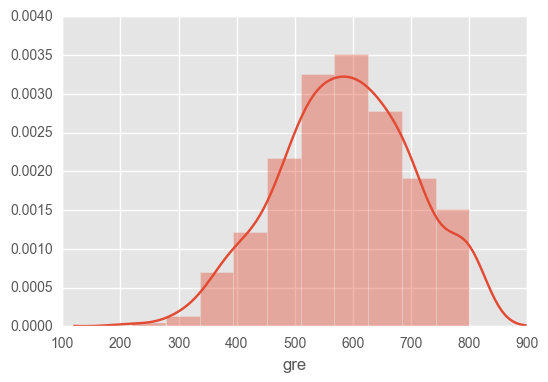

In [15]:
sns.distplot(df2['gre'],bins=10);

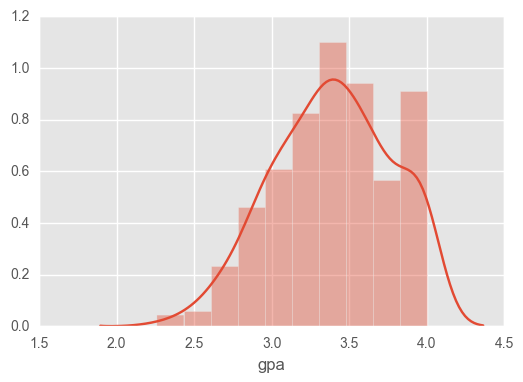

In [16]:
sns.distplot(df2['gpa'],bins=10);

In [17]:
df2['gpa'].mean() / df2['gpa'].median()

0.9977181804711814

In [18]:
df2['gre'].mean() / df2['gre'].median()

1.0135499001129158

> ### Question 10.  Create a correlation matrix for the dataset

In [19]:
df2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: gre and gpa appear to have some colinearity, as high gpas can correlate with high gres (also shown in the pairplots below), however the correlation is not overwhelmingly strong (38%).  

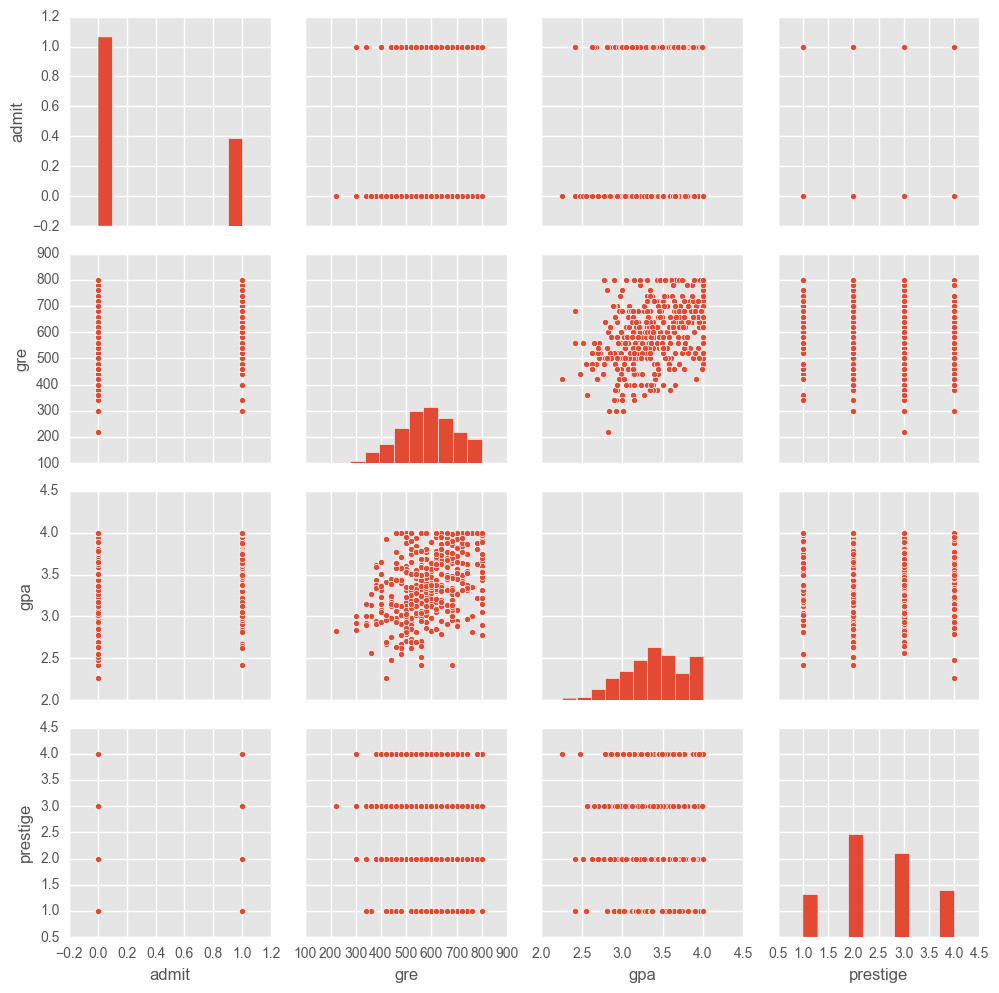

In [20]:
sns.pairplot(df2);

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:  We want to test if there is a correlation between graduate school admission rates and prestige of undergraduate school.  

1) First we look at the pool of applicants that were not admitted:  on average they have a mean prestige of 2.64, but prestige scores ranged from 1-4.  Then we look at the pool of applicants that were admitted:  on average they have a mean prestige of 2.15 (so marginally more prestigious) but prestige scores also ranged from 1-4.  From this there is no obvious correlation.  

2) Next, our correlation matrix from above shows a slight inverse correlation of -.24 (e.g. lower prestige numbers (which imply more prestigious alma maters) are slighly correlated with getting admitted.  

3) Since we are using supervised learning to find the association between admission (catgorical variable) and prestige, we can see if a kNN classification gives any insight 

In [21]:
df2[df2['admit']==0]['prestige'].describe()

count    271.000000
mean       2.645756
std        0.918922
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

In [22]:
df2[df2['admit']==1]['prestige'].describe()

count    126.000000
mean       2.150794
std        0.921455
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

> ### Question 13.  What is your hypothesis?

Answer: For applicants to UCLA graduate school, we suspect applicants who were granted admission came from more prestigious alma maters (on average) than applicants that were not granted admission.  Recall 1 = most prestigious and 4 = least prestigious.  That said, other variables (e.g. gre, gpa) may also be correlated with admission.  